In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)

In [6]:
crime=pd.read_csv("phase_4.csv")


In [7]:
crime

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [8]:
crime.shape

(9017, 33)

In [9]:
crime.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [10]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   YEAR                                                 9017 non-null   int64 
 3   MURDER                                               9017 non-null   int64 
 4   ATTEMPT TO MURDER                                    9017 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   int64 
 6   RAPE                                                 9017 non-null   int64 
 7   CUSTODIAL RAPE                                       9017 non-null   int64 
 8   OTHER RAPE                                           9017 non-null   int64 
 9

In [11]:
crime.isnull().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

In [12]:
crime.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
count,9017.000000,9017.00000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,...,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000
mean,2006.629034,89.28535,78.069646,9.895531,53.041366,0.005767,53.035599,79.152046,58.535433,20.616613,...,25.219918,747.893091,20.228901,100.511257,27.515582,194.122435,0.197849,222.216702,2174.299434,5310.115116
std,3.463623,327.27503,303.446020,59.521657,190.741450,0.115223,190.725474,317.630964,246.937464,88.586415,...,98.880282,3024.106467,96.970466,394.059436,167.237522,831.986594,2.415039,936.002540,7988.438462,18524.381119
min,2001.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,18.00000,10.000000,0.000000,8.000000,0.000000,8.000000,10.000000,6.000000,1.000000,...,2.000000,43.000000,1.000000,10.000000,0.000000,11.000000,0.000000,5.000000,265.000000,853.000000
50%,2007.000000,38.00000,28.000000,2.000000,20.000000,0.000000,20.000000,25.000000,18.000000,5.000000,...,8.000000,199.000000,5.000000,31.000000,2.000000,47.000000,0.000000,68.000000,745.000000,2096.000000
75%,2010.000000,66.00000,56.000000,6.000000,41.000000,0.000000,41.000000,56.000000,42.000000,13.000000,...,20.000000,529.000000,16.000000,76.000000,13.000000,135.000000,0.000000,177.000000,1608.000000,3972.000000
max,2012.000000,7601.00000,7964.000000,1616.000000,3425.000000,5.000000,3425.000000,8878.000000,7910.000000,2416.000000,...,2830.000000,56768.000000,2322.000000,7118.000000,4970.000000,19865.000000,83.000000,16076.000000,124176.000000,220335.000000


In [13]:
index_name=crime[crime['DISTRICT']=='TOTAL'].index #dropping the DISTRICT WHICH SHOWS VALUE AS TOTAL
crime.drop(index_name, inplace=True)
crime

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,DELHI UT,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
9011,DELHI UT,WEST,2012,52,37,10,79,0,79,454,...,18,227,18,53,6,327,0,292,1144,5558
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787


In [14]:
#crime=crime[['STATE/UT','YEAR','MURDER','KIDNAPPING & ABDUCTION','THEFT']].copy()
#crime

In [15]:
g = pd.DataFrame(crime.groupby(['YEAR']).sum().reset_index())
g

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,2001,36749,32033,3430,16456,0,16456,24114,15609,8505,...,10584,273498,6964,34626,9836,49308,114,57614,723362,1823692
1,2002,35821,30820,3692,16776,3,16773,23173,15399,7774,...,11877,266876,6957,34389,10283,49372,76,64460,751173,1829467
2,2003,33201,26349,4094,16337,1,16336,21148,14093,7055,...,9425,263152,6338,33428,12430,51914,46,61074,720457,1763524
3,2004,34089,28409,4015,18784,2,18782,24536,16459,8077,...,8675,278648,7152,35168,10131,59375,89,69856,763074,1885633
4,2005,33174,28498,3642,19017,7,19010,24422,16856,7566,...,8498,272675,6901,34937,10209,59643,150,72332,766276,1878667
5,2006,32957,27740,3610,19971,2,19969,25433,18480,6953,...,8513,266566,7755,37335,10110,64856,67,78880,806502,1936256
6,2007,32813,27931,3738,21335,1,21334,29249,21583,7666,...,9055,274803,8231,39602,11117,77717,61,87042,854060,2045738
7,2008,33320,28987,3929,21933,0,21933,31828,24075,7753,...,9290,286905,8301,41024,12344,82731,67,92912,874859,2142729
8,2009,32921,29407,4014,21866,2,21864,36396,27396,9000,...,8770,281152,8524,39263,11127,90829,48,99378,880349,2171596
9,2010,33900,29732,3853,22679,6,22673,41648,31535,10113,...,8560,290947,8534,41214,10041,95445,36,107257,938127,2276123


In [16]:
rape = pd.DataFrame(crime.groupby(['YEAR'])['RAPE'].sum().reset_index())
rape.columns = ['YEAR','RAPE']
rape

,YEAR,RAPE
0,2001,16456
1,2002,16776
2,2003,16337
3,2004,18784
4,2005,19017
5,2006,19971
6,2007,21335
7,2008,21933
8,2009,21866
9,2010,22679


Text(0, 0.5, 'RAPE')

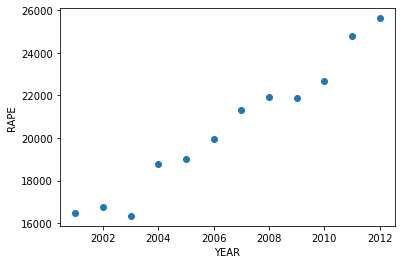

In [17]:
plt.scatter(rape.YEAR,rape['RAPE'])
plt.xlabel('YEAR')
plt.ylabel('RAPE')

In [18]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(rape[['YEAR','RAPE']])
y_predicted

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [19]:
rape['cluster']=y_predicted
rape.head()

,YEAR,RAPE,cluster
0,2001,16456,0
1,2002,16776,0
2,2003,16337,0
3,2004,18784,0
4,2005,19017,0


In [20]:
km.cluster_centers_

array([[ 2003. , 17474. ],
       [ 2008. , 21556.8],
       [ 2011.5, 25203.5]])

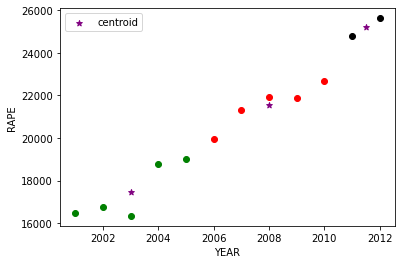

In [21]:
df1 = rape[rape.cluster==0]
df2 = rape[rape.cluster==1]
df3 = rape[rape.cluster==2]

plt.scatter(df1.YEAR,df1['RAPE'],color='green')
plt.scatter(df2.YEAR,df2['RAPE'],color='red')
plt.scatter(df3.YEAR,df3['RAPE'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('YEAR')
plt.ylabel('RAPE')
plt.legend()

In [22]:
scaler = MinMaxScaler()

scaler.fit(rape[['RAPE']])
rape['RAPE'] = scaler.transform(rape[['RAPE']])

In [23]:
rape.head()

,YEAR,RAPE,cluster
0,2001,0.012807,0
1,2002,0.047245,0
2,2003,0.000000,0
3,2004,0.263345,0
4,2005,0.288420,0


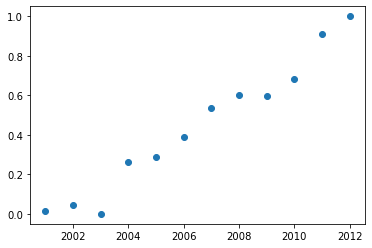

In [24]:
plt.scatter(rape.YEAR,rape['RAPE'])

In [25]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(rape[['YEAR','RAPE']])
y_predicted

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0])

In [26]:
rape['cluster']=y_predicted
rape.head()

,YEAR,RAPE,cluster
0,2001,0.012807,1
1,2002,0.047245,1
2,2003,0.000000,1
3,2004,0.263345,1
4,2005,0.288420,1


In [27]:
km.cluster_centers_

array([[2.01100000e+03, 8.63646147e-01],
       [2.00300000e+03, 1.22363323e-01],
       [2.00750000e+03, 5.31559406e-01]])

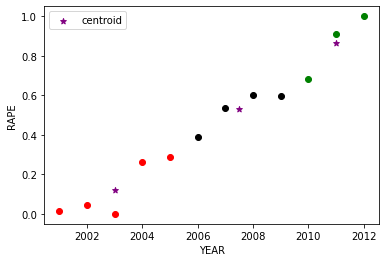

In [28]:
df1 = rape[rape.cluster==0]
df2 = rape[rape.cluster==1]
df3 = rape[rape.cluster==2]

plt.scatter(df1.YEAR,df1['RAPE'],color='green')
plt.scatter(df2.YEAR,df2['RAPE'],color='red')
plt.scatter(df3.YEAR,df3['RAPE'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('YEAR')
plt.ylabel('RAPE')
plt.legend()

In [29]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(rape[['YEAR','RAPE']])
    sse.append(km.inertia_)

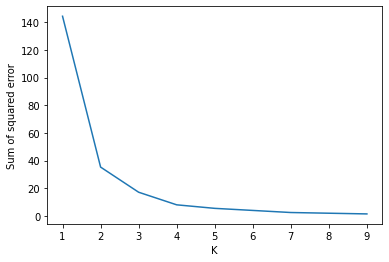

In [30]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [31]:
fig = px.bar(rape,x='YEAR',y='RAPE',color_discrete_sequence=['blue'])
fig.show()

In [32]:
rape_state = pd.DataFrame(crime.groupby(['STATE/UT'])['RAPE'].sum().reset_index())
rape_state.columns = ['STATE/UT','RAPE']
rape_state

,STATE/UT,RAPE
0,A & N ISLANDS,109
1,ANDHRA PRADESH,13479
2,ARUNACHAL PRADESH,500
3,ASSAM,16178
4,BIHAR,13124
5,CHANDIGARH,281
6,CHHATTISGARH,11838
7,D & N HAVELI,56
8,DAMAN & DIU,20
9,DELHI UT,12848


In [33]:
rape_state.head(10)

,STATE/UT,RAPE
0,A & N ISLANDS,109
1,ANDHRA PRADESH,13479
2,ARUNACHAL PRADESH,500
3,ASSAM,16178
4,BIHAR,13124
5,CHANDIGARH,281
6,CHHATTISGARH,11838
7,D & N HAVELI,56
8,DAMAN & DIU,20
9,DELHI UT,12848


In [34]:
fig = px.bar(rape_state,x='STATE/UT',y='RAPE',color_discrete_sequence=['blue'])
fig.show()

In [35]:
murder = pd.DataFrame(crime.groupby(['YEAR'])['MURDER'].sum().reset_index())
murder.columns = ['YEAR','MURDER']
murder

,YEAR,MURDER
0,2001,36749
1,2002,35821
2,2003,33201
3,2004,34089
4,2005,33174
5,2006,32957
6,2007,32813
7,2008,33320
8,2009,32921
9,2010,33900


In [36]:
fig = px.bar(murder,x='YEAR',y='MURDER',color_discrete_sequence=['blue'])
fig.show()